### Under Sampling Method

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.model_selection import StratifiedKFold
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import pickle

In [2]:
df = pd.read_csv(r'D:\Uni Docs\DSC4996\Dynamic_fraud_detection_system\Data\pre_processed_df.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
fraud = df[df['Class']==1]

In [5]:
genuine = df[df['Class']==0].sample(1103)

In [6]:
df_balanced = pd.concat([fraud,genuine])
df_balanced = df_balanced.sample(frac=1, random_state=42)

In [7]:
df_balanced

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
199008,133103.0,1.768454,-1.401038,-1.745886,-0.829440,0.043092,0.905456,-0.505465,0.227526,-0.355397,...,0.107501,0.685232,-0.084145,-1.617945,-0.097784,0.415857,-0.001017,-0.062018,154.57,0
46650,42955.0,0.002606,0.883100,0.497527,0.470921,0.266207,-0.356720,0.514707,-0.100734,0.710213,...,-0.188124,0.133296,0.007081,0.009448,-0.310013,0.291830,0.192335,-0.138443,10.70,0
66257,52089.0,1.105159,0.869047,0.180332,2.617000,0.140861,-0.620805,0.245013,-0.040630,-1.181770,...,-0.172939,-0.593205,0.045767,0.382387,0.335759,-0.192184,-0.001719,0.049125,14.99,0
31213,36326.0,-3.309639,1.215284,1.927406,0.195831,-1.494765,1.216949,0.321950,-0.010159,2.433026,...,-0.363765,0.079675,-0.143149,0.143004,0.370212,0.319330,-1.063099,0.036667,128.00,0
59234,48861.0,-0.658407,1.058388,1.377988,-0.151617,0.372590,-0.814378,1.044088,-0.274439,-0.305284,...,0.109511,0.455547,-0.184624,0.525660,0.141396,-0.605277,-0.158194,-0.119418,2.68,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154692,105042.0,-1.641777,-2.521307,0.942145,-2.027955,-1.732736,3.115657,1.284630,0.650750,3.548868,...,0.578587,1.288988,1.529751,-1.685662,-0.832459,0.103263,0.052966,0.257827,679.32,0
139414,83441.0,-2.243871,0.435700,0.547521,0.568639,-0.124721,1.333716,1.035985,0.494300,-0.516821,...,0.153689,0.933421,0.291245,-0.607411,-0.112553,-0.282750,-0.255985,0.085373,213.12,0
218746,141764.0,-11.182101,-15.650427,-6.565698,4.691400,-15.253546,9.291293,19.194427,-0.969344,-2.829544,...,3.175706,-1.490534,13.321114,-0.071133,2.574408,-1.003210,-1.993270,0.242941,5714.20,0
117849,75036.0,1.222938,0.209983,-0.197963,0.261017,0.470779,0.407764,-0.065336,0.125026,-0.226461,...,-0.270108,-0.786489,-0.017510,-1.175298,0.279890,0.175820,-0.011680,0.009129,17.28,0


In [8]:
df_balanced.to_csv(r'D:\Uni Docs\DSC4996\Dynamic_fraud_detection_system\Data\Dataset01.csv') 

In [9]:
df_balanced = pd.read_csv(r'D:\Uni Docs\DSC4996\Dynamic_fraud_detection_system\Data\Dataset01.csv')

In [10]:
df_balanced = df_balanced.drop('Unnamed: 0',axis=1)

In [11]:
features = df_balanced.drop('Class',axis=1)
target = df_balanced['Class']

In [12]:
target.value_counts()

Class
0    1103
1     473
Name: count, dtype: int64

In [13]:
scaler = StandardScaler()
features[['Time','Amount']] = scaler.fit_transform(features[['Time','Amount']])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state=1234)

In [15]:
X_train.shape

(1103, 30)

In [16]:
X_test.shape

(473, 30)

In [17]:
X_test.to_csv(r'D:\Uni Docs\DSC4996\Dynamic_fraud_detection_system\Data\X_test.csv') 

### Model Traning + Hyperparameter Tunning

#### Logistic Regression Model

In [15]:
#the hyperparameters to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter':[1000,2000,5000]
}

In [16]:
# Create a GridSearchCV object
gscv = GridSearchCV(LogisticRegression(), param_grid, cv=5)

In [17]:
# Fit the GridSearchCV object to the training data
gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'max_iter': [1000, 2000, 5000],
                         'solver': ['liblinear', 'lbfgs']})

In [18]:
best_params = gscv.best_params_

In [19]:
print(best_params)

{'C': 0.1, 'max_iter': 1000, 'solver': 'lbfgs'}


In [20]:
lgt = LogisticRegression(**best_params)
lgt.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=1000)

In [21]:
y_pred = lgt.predict(X_test)

In [22]:
accuracy_lgt = accuracy_score(y_test, y_pred)
precision_lgt = precision_score(y_test, y_pred)
recall_lgt = recall_score(y_test, y_pred)
f1_score_lgt = f1_score(y_test, y_pred)
mcc_lgt = matthews_corrcoef(y_test, y_pred)

print("Accuracy:", accuracy_lgt)
print("Precision:", precision_lgt)
print("Recall:", recall_lgt)
print("F1-score:", f1_score_lgt)
print("MCC:", mcc_lgt)

Accuracy: 0.9619450317124736
Precision: 0.9708029197080292
Recall: 0.9047619047619048
F1-score: 0.9366197183098592
MCC: 0.9106298047299182


In [23]:
cm_logit = confusion_matrix(y_test, y_pred)
print(cm_logit)

[[322   4]
 [ 14 133]]


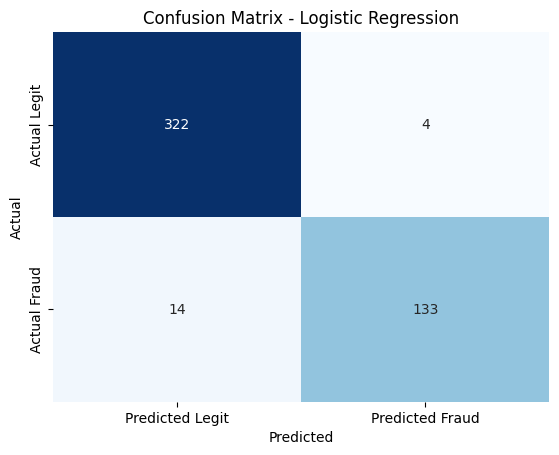

In [24]:
sns.heatmap(cm_logit, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Legit", "Predicted Fraud"],
            yticklabels=["Actual Legit", "Actual Fraud"])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### SVM Model

In [25]:
param_grid_svm = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              } 

In [26]:
# Create a GridSearchCV object
gscv_svm = GridSearchCV(SVC(), param_grid_svm, cv=5)

In [27]:
gscv_svm.fit(X_train, y_train) 

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]})

In [28]:
best_params_svm = gscv_svm.best_params_

In [29]:
print(best_params_svm)

{'C': 1000, 'gamma': 0.001}


In [30]:
svm = SVC(**best_params_svm)

svm.fit(X_train, y_train)

SVC(C=1000, gamma=0.001)

In [31]:
y_pred_svm = svm.predict(X_test)

In [32]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_score_svm = f1_score(y_test, y_pred_svm)
mcc_svm = matthews_corrcoef(y_test, y_pred_svm)

print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-score:", f1_score_svm)
print("MCC:", mcc_svm)

Accuracy: 0.959830866807611
Precision: 0.9637681159420289
Recall: 0.9047619047619048
F1-score: 0.9333333333333333
MCC: 0.9055545143334147


In [33]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

[[321   5]
 [ 14 133]]


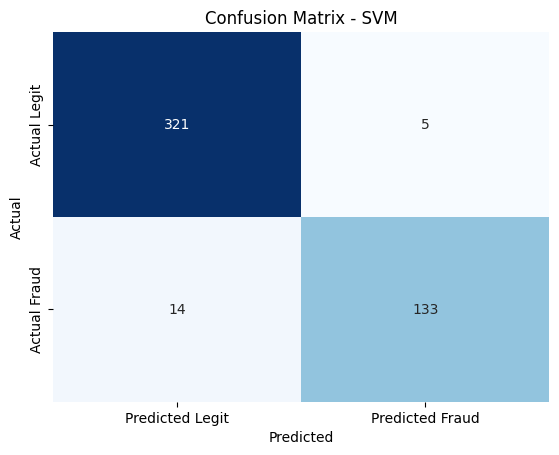

In [34]:
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Legit", "Predicted Fraud"],
            yticklabels=["Actual Legit", "Actual Fraud"])
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Decision Tree

In [36]:
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20, 50],
    'min_samples_leaf': [1, 2, 5, 10, 20],
    'criterion': ['gini', 'entropy']
}

In [37]:
# Create a GridSearchCV object
gscv_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5)

In [38]:
gscv_dt.fit(X_train, y_train) 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 5, 10, 20],
                         'min_samples_split': [2, 5, 10, 20, 50]})

In [39]:
gscv_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [40]:
best_params_dt = gscv_dt.best_params_

In [41]:
dtree = DecisionTreeClassifier(**best_params_dt)

dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [42]:
y_pred_dtree = dtree.predict(X_test)

In [43]:
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
precision_dtree = precision_score(y_test, y_pred_dtree)
recall_dtree = recall_score(y_test, y_pred_dtree)
f1_score_dtree = f1_score(y_test, y_pred_dtree)
mcc_dtree = matthews_corrcoef(y_test, y_pred_dtree)

print("Accuracy:", accuracy_dtree)
print("Precision:", precision_dtree)
print("Recall:", recall_dtree)
print("F1-score:", f1_score_dtree)
print("MCC:", mcc_dtree)

Accuracy: 0.9365750528541226
Precision: 0.9148936170212766
Recall: 0.8775510204081632
F1-score: 0.8958333333333333
MCC: 0.8506505787138373


In [44]:
cm_dt = confusion_matrix(y_test, y_pred_dtree)
print(cm_dt)

[[314  12]
 [ 18 129]]


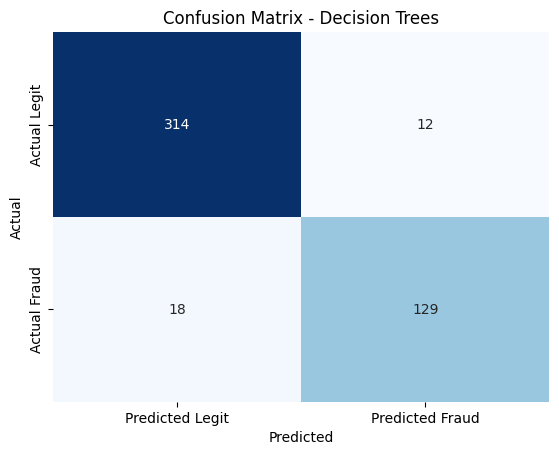

In [45]:
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Legit", "Predicted Fraud"],
            yticklabels=["Actual Legit", "Actual Fraud"])
plt.title('Confusion Matrix - Decision Trees')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### CNN

In [212]:
X_val, X_test1, y_val, y_test1 = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [213]:
X_train1 = X_train.to_numpy()
y_train1 = y_train.to_numpy()
X_val1 = X_val.to_numpy()
y_val1 = y_val.to_numpy()
X_test1 = X_test1.to_numpy()
y_test1 = y_test1.to_numpy()

In [214]:
X_train1 = X_train1.reshape(X_train1.shape[0],X_train1.shape[1],1)
X_test1 = X_test1.reshape(X_test1.shape[0],X_test1.shape[1],1)
X_train1.shape, X_test1.shape

((1103, 30, 1), (237, 30, 1))

In [215]:
X_val1.shape

(236, 30)

In [216]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
#from keras.wrappers.scikit_learn import KerasClassifier
import keras_tuner
from tensorflow import keras
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [217]:
#import model
model=Sequential()

In [218]:
def build_model(hp):
  model = keras.Sequential([
    keras.layers.Conv1D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [1,3,5]),
        activation='relu',
        input_shape= (X_train1.shape[1],1)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),

    keras.layers.Conv1D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [1,3,5]),
        activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),

    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
  ])

  model.build()

  model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
                loss='binary_crossentropy',
                metrics=['accuracy'])

  return model


In [219]:
tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='D:/Uni Docs/DSC4996/Dynamic_fraud_detection_system/CNN_output',project_name="Hyperparameter Tuning of CNN")

'''tuner = keras_tuner.RandomSearch(
    build_model, 
    objective='val_loss',
    max_trials=5)'''

Reloading Tuner from D:/Uni Docs/DSC4996/Dynamic_fraud_detection_system/CNN_output\Hyperparameter Tuning of CNN\tuner0.json


"tuner = keras_tuner.RandomSearch(\n    build_model, \n    objective='val_loss',\n    max_trials=5)"

In [220]:
tuner.search(X_train1, y_train1, epochs=20, validation_data=(X_val1, y_val1),input_shape = (X_train1.shape[1],1))
#tuner.search(X_train1, y_train1, epochs=20, validation_split = 0.1)

In [221]:
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

In [222]:
cnn_best = tuner.hypermodel.build(best_hps)

c:\Users\Ravin\anaconda3\envs\dsc4996\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [223]:
cnn1 = cnn_best.fit(X_train1, y_train1, epochs = 100, validation_data = (X_val1, y_val1))

Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8882 - loss: 0.3622 - val_accuracy: 0.9349 - val_loss: 0.2609
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9402 - loss: 0.1726 - val_accuracy: 0.9570 - val_loss: 0.3095
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9537 - loss: 0.1374 - val_accuracy: 0.9427 - val_loss: 0.2932
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9552 - loss: 0.1490 - val_accuracy: 0.9466 - val_loss: 0.2055
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9512 - loss: 0.1374 - val_accuracy: 0.9388 - val_loss: 0.2422
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9523 - loss: 0.1542 - val_accuracy: 0.9362 - val_loss: 0.1820
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9545 - loss: 0.1565 - val_accuracy: 0.9505 - val_loss: 0.1668
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9706 - loss: 0.1048 - val_accuracy: 0.9505 - v

In [107]:
#best_model=tuner.get_best_models(num_models=1)[0]
#best_model(X_train1)

In [224]:
cnn_best.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 26, 112)           │        672 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_4           │ (None, 26, 112)           │        448 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_6 (Dropout)             │ (None, 26, 112)           │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_5 (Conv1D)               │ (None, 22, 48)            │     26,928 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_5           │ (None, 22, 48)            │        192 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_7 (Dropout)             │ (None, 22, 48)            │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten_2 (Flatten)             │ (None, 1056)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_8 (Dense)                 │ (None, 96)                │    101,472 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_8 (Dropout)             │ (None, 96)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_9 (Dense)                 │ (None, 1)                 │         97 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 388,789 (1.48 MB)

 Trainable params: 129,489 (505.82 KB)

 Non-trainable params: 320 (1.25 KB)

 Optimizer params: 258,980 (1011.64 KB)

In [225]:
from matplotlib import pyplot

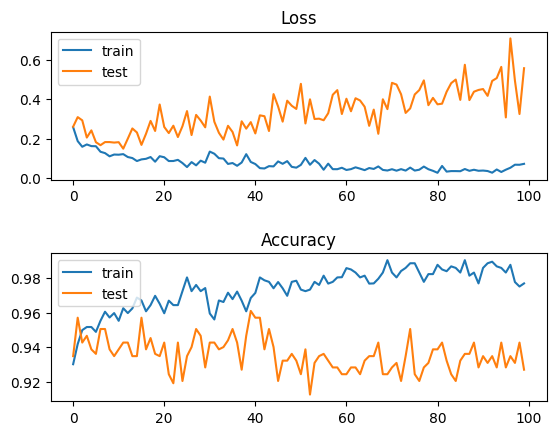

In [226]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(cnn1.history['loss'], label='train')
pyplot.plot(cnn1.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplots_adjust(hspace=0.5)
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(cnn1.history['accuracy'], label='train')
pyplot.plot(cnn1.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

#### CNN with early stopping

In [236]:
early_stopping_cnn = EarlyStopping(monitor='val_loss', patience=10)


In [237]:
cnn2 = cnn_best.fit(X_train1, y_train1, epochs=100, validation_data=(X_val1,y_val1), callbacks=[early_stopping_cnn])

Epoch 1/100


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9892 - loss: 0.0341 - val_accuracy: 0.9049 - val_loss: 0.4756
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9836 - loss: 0.0359 - val_accuracy: 0.9167 - val_loss: 0.6376
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9914 - loss: 0.0225 - val_accuracy: 0.9141 - val_loss: 0.3916
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9866 - loss: 0.0480 - val_accuracy: 0.9206 - val_loss: 0.3903
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9941 - loss: 0.0218 - val_accuracy: 0.9349 - val_loss: 0.7380
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9850 - loss: 0.0296 - val_accuracy: 0.9049 - val_loss: 0.8288
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9862 - loss: 0.0575 - val_accuracy: 0.9089 - val_loss: 0.4606
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9616 - loss: 0.1053 - val_accuracy: 0.9388 - val_loss: 0.7

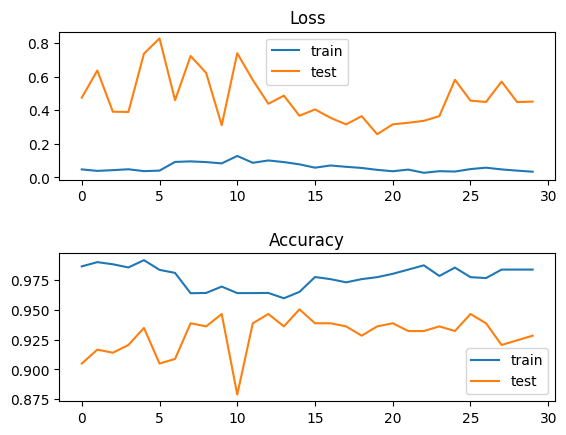

In [238]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(cnn2.history['loss'], label='train')
pyplot.plot(cnn2.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplots_adjust(hspace=0.5)
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(cnn2.history['accuracy'], label='train')
pyplot.plot(cnn2.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [239]:
cnn_best.save(r'D:\Uni Docs\DSC4996\Dynamic_fraud_detection_system\CNN_output\cnn_best_us_with_es.h5')
print("Saved model to disk")

Saved model to disk


In [240]:
y_pred_cnn = cnn_best.predict(X_test1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [242]:
import numpy as np

def predict_classes(probs, threshold=0.5):

  classes = np.zeros_like(probs, dtype=int)
  classes[probs >= threshold] = 1
  return classes


In [243]:
preds = predict_classes(y_pred_cnn)

In [246]:
accuracy_cnn = accuracy_score(y_test1, preds)
precision_cnn = precision_score(y_test1, preds)
recall_cnn = recall_score(y_test1, preds)
f1_score_cnn = f1_score(y_test1, preds)
mcc_cnn = matthews_corrcoef(y_test1, preds)

print("Accuracy:", accuracy_cnn)
print("Precision:", precision_cnn)
print("F1-score:", f1_score_cnn)
print("Recall:", recall_cnn)
print("MCC:", mcc_cnn)

Accuracy: 0.9746835443037974
Precision: 0.9558823529411765
F1-score: 0.9558823529411765
Recall: 0.9558823529411765
MCC: 0.9381308736512356


In [248]:
cm_cnn = confusion_matrix(y_test1, preds)
print(cm_cnn)

[[166   3]
 [  3  65]]


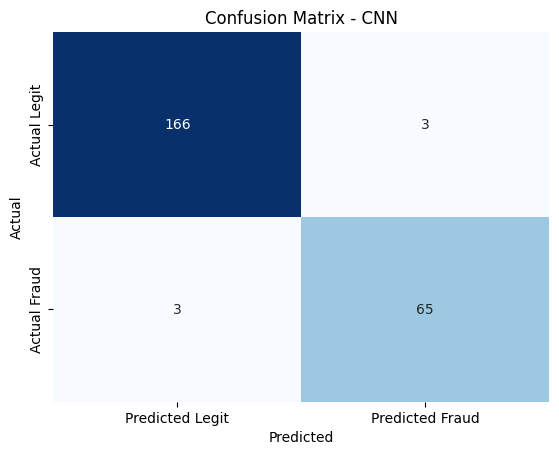

In [249]:
sns.heatmap(cm_cnn, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Legit", "Predicted Fraud"],
            yticklabels=["Actual Legit", "Actual Fraud"])
plt.title('Confusion Matrix - CNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## LSTM

In [139]:
import pandas as pd
import sklearn.metrics as metrique
from pandas import Series
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
import numpy as np
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, Dropout,Input, Attention, Layer, Concatenate, Permute, Dot, Multiply, Flatten
from keras.layers import RepeatVector, Dense, Activation, Lambda
from keras.models import Sequential
from keras import backend as K, regularizers, Model, metrics

In [140]:
df_lstm = pd.read_csv(r'D:\Uni Docs\DSC4996\Dynamic_fraud_detection_system\Data\Dataset01.csv')

In [141]:
df_lstm = df_lstm.drop('Unnamed: 0', axis=1)

In [142]:
df_lstm.shape

(1576, 31)

In [143]:
X = df_lstm.drop(['Class'], axis = 'columns')
Label_Data = df_lstm['Class']

In [144]:
X_r2 = StandardScaler().fit_transform(X)

In [145]:
X_train,X_test,y_train,y_test = train_test_split(X_r2, Label_Data, test_size=0.3)

In [146]:
X_train.shape

(1103, 30)

In [147]:
X_val, X_test1, y_val, y_test1 = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [153]:
# design network
np.random.seed(7)

train_LSTM_X=X_train
val_LSTM_X=X_val

## Reshape input to be 3D [samples, timesteps, features] (format requis par LSTM)
train_LSTM_X = train_LSTM_X.reshape((train_LSTM_X.shape[0], 1, train_LSTM_X.shape[1]))
val_LSTM_X = val_LSTM_X.reshape((val_LSTM_X.shape[0], 1, val_LSTM_X.shape[1]))

train_LSTM_y=y_train
val_LSTM_y=y_val

test_LSTM_X = X_test1.reshape((X_test1.shape[0], 1, X_test1.shape[1]))

In [154]:
inputs = Input((1,30))
x1 = LSTM(50, dropout=0.3, recurrent_dropout=0.2, return_sequences=True)(inputs)
x2 = LSTM(50, dropout=0.3, recurrent_dropout=0.2)(x1)
outputs = Dense(1, activation='sigmoid')(x2)
model = Model(inputs, outputs)

In [155]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [156]:
lstm1 =model.fit(train_LSTM_X, train_LSTM_y,epochs=100, validation_data=(val_LSTM_X, val_LSTM_y))

Epoch 1/100


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8235 - loss: 0.6624 - val_accuracy: 0.9237 - val_loss: 0.5286
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9226 - loss: 0.4773 - val_accuracy: 0.9237 - val_loss: 0.2840
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9309 - loss: 0.2605 - val_accuracy: 0.9322 - val_loss: 0.2138
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9384 - loss: 0.1987 - val_accuracy: 0.9322 - val_loss: 0.1920
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9477 - loss: 0.1754 - val_accuracy: 0.9322 - val_loss: 0.1795
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9499 - loss: 0.1624 - val_accuracy: 0.9407 - val_loss: 0.1685
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9535 - loss: 0.1459 - val_accuracy: 0.9407 - val_loss: 0.1621
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9538 - loss: 0.1476 - val_accuracy: 0.9407 - val_loss: 0.1

In [157]:
# save model and architecture to single file
model.save(r'D:\Uni Docs\DSC4996\Dynamic_fraud_detection_system\LSTM\lstm_Model_us_without_es.h5')
print("Saved model to disk")

Saved model to disk


#### training with Early stopping

In [163]:
inputs = Input((1,30))
x1 = LSTM(50, dropout=0.3, recurrent_dropout=0.2, return_sequences=True)(inputs)
x2 = LSTM(50, dropout=0.3, recurrent_dropout=0.2)(x1)
outputs = Dense(1, activation='sigmoid')(x2)
model2 = Model(inputs, outputs)

In [164]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [165]:
early_stopping_lstm = EarlyStopping(monitor='val_loss', patience=10)

In [166]:
lstm2 = model2.fit(train_LSTM_X, train_LSTM_y, epochs=100, validation_data=(val_LSTM_X, val_LSTM_y), callbacks=[early_stopping_lstm])

Epoch 1/100


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6754 - loss: 0.6775 - val_accuracy: 0.9237 - val_loss: 0.5771
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9170 - loss: 0.5279 - val_accuracy: 0.9280 - val_loss: 0.3191
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9407 - loss: 0.2741 - val_accuracy: 0.9280 - val_loss: 0.2224
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9382 - loss: 0.2159 - val_accuracy: 0.9322 - val_loss: 0.1992
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9317 - loss: 0.2148 - val_accuracy: 0.9322 - val_loss: 0.1827
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9498 - loss: 0.1601 - val_accuracy: 0.9364 - val_loss: 0.1710
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9652 - loss: 0.1381 - val_accuracy: 0.9364 - val_loss: 0.1634
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9542 - loss: 0.1411 - val_accuracy: 0.9407 - val_loss: 0.1

In [167]:
# save model and architecture to single file
model2.save(r'D:\Uni Docs\DSC4996\Dynamic_fraud_detection_system\LSTM\lstm_Model_us_with_es.h5')
print("Saved model to disk")

Saved model to disk


In [168]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model
 
# load model
model = load_model(r'D:\Uni Docs\DSC4996\Dynamic_fraud_detection_system\LSTM\lstm_Model_us_without_es.h5')
model2 = load_model(r'D:\Uni Docs\DSC4996\Dynamic_fraud_detection_system\LSTM\lstm_Model_us_with_es.h5')
# summarize model.
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 1, 30)             │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ lstm_2 (LSTM)                   │ (None, 1, 50)             │     16,200 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)                │     20,200 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_5 (Dense)                 │ (None, 1)                 │         51 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 36,453 (142.40 KB)

 Trainable params: 36,451 (142.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [169]:
# evaluate the model
_, train_acc = model2.evaluate(train_LSTM_X, train_LSTM_y, verbose=0)
_, test_acc = model2.evaluate(val_LSTM_X, val_LSTM_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.976, Test: 0.949


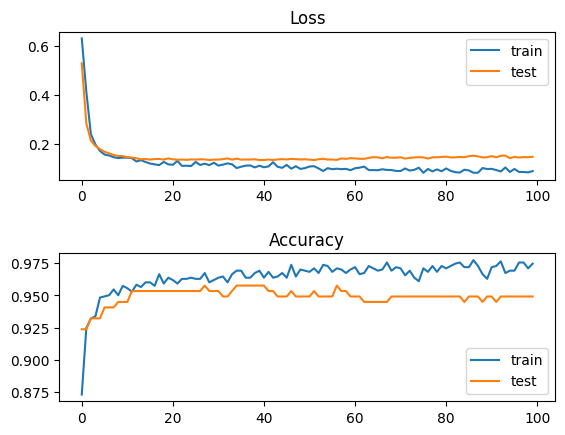

In [170]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(lstm1.history['loss'], label='train')
pyplot.plot(lstm1.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplots_adjust(hspace=0.5)
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(lstm1.history['accuracy'], label='train')
pyplot.plot(lstm1.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

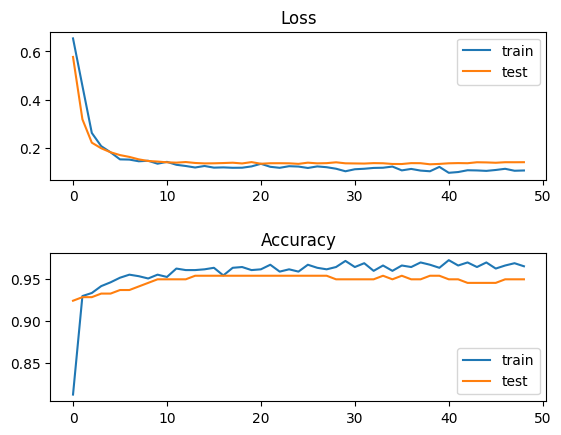

In [171]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(lstm2.history['loss'], label='train')
pyplot.plot(lstm2.history['val_loss'], label='test')
pyplot.legend()

pyplot.subplots_adjust(hspace=0.5)
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(lstm2.history['accuracy'], label='train')
pyplot.plot(lstm2.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()


In [172]:
# predict probabilities for test set
yhat_probs = model2.predict(test_LSTM_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

In [173]:
yhat_classes = (yhat_probs > 0.5).astype(int)

In [174]:
accuracy_lstm = accuracy_score(y_test1, yhat_classes)
print('Accuracy: %f' % accuracy_lstm)
precision_lstm = precision_score(y_test1, yhat_classes)
print('Precision: %f' % precision_lstm)
recall_lstm = recall_score(y_test1, yhat_classes)
print('Recall: %f' % recall_lstm)
f1_score_lstm = f1_score(y_test1, yhat_classes)
print('F1-Score: %f' % f1_score_lstm)
mcc_lstm = matthews_corrcoef(y_test1, yhat_classes)
print('MCC: %f' % mcc_lstm)


Accuracy: 0.949367
Precision: 0.953125
Recall: 0.871429
F1-Score: 0.910448
MCC: 0.876960


In [175]:
cm_lstm = confusion_matrix(y_test1, yhat_classes)

In [176]:
cm_lstm

array([[164,   3],
       [  9,  61]], dtype=int64)

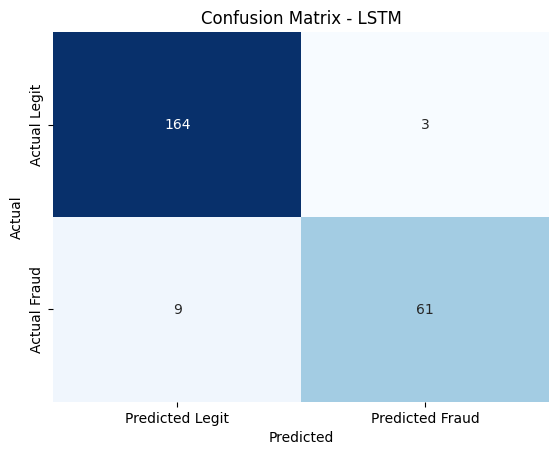

In [178]:
sns.heatmap(cm_lstm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Legit", "Predicted Fraud"],
            yticklabels=["Actual Legit", "Actual Fraud"])
plt.title('Confusion Matrix - LSTM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Explainable AI with CNN model

In [19]:
model3 = tf.keras.models.load_model(r'D:\Uni Docs\DSC4996\Dynamic_fraud_detection_system\CNN_output\best_model_us_data.h5')

In [60]:
import shap
import lime
from lime.lime_tabular import LimeTabularExplainer


In [61]:
explainer = LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['Genuine', 'Fraud'], verbose=True, mode='classification')

In [62]:
sample = X_test.iloc[85]

In [63]:
sample.shape

(30,)

In [64]:
def predict_proba(data):
    proba = model3.predict(data)
    return np.hstack((1 - proba, proba))

In [65]:
explanation = explainer.explain_instance(sample, predict_proba, num_features=5)

 35/157 [=====>........................] - ETA: 0s

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


157/157 [==============================] - 0s 1ms/step
Intercept 0.5389412572779576
Prediction_local [0.23319741]
Right: 0.000102364356


Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


In [59]:
explanation.as_pyplot_figure

<bound method Explanation.as_pyplot_figure of <lime.explanation.Explanation object at 0x000002193D532100>>

In [66]:
print(type(explanation))

<class 'lime.explanation.Explanation'>


In [46]:
explanation.show_in_notebook(show_table=True)